# WeRateDogs -  Data Wrangling

Neste projeto, segundo projeto do curso de Fundamentos de Data Science II, foi recebido um arquivo chamado: twitter-archive-enhanced contendo arquivos brutos extraídos do Twitter WeRateDogs.
A partir deste arquivo, utilizando os IDs, consultamos a API do Twitter para reunir todos os dados JSON do tweet original do arquivos.
Em seguida utilizamos os dados JSON para avaliar, limpar e preparar o conjunto de dados para análise.
Para o auxílio da análise foram usados as previões de raça de cães.

In [1]:
#Importação de Bibliotecas Utilizadas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
import seaborn as sns


In [2]:
from IPython.display import HTML, Image
#Fonte: https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer

## 1- Dados Iniciais

**1.1 -Base de dados fornecidas pela Udacity**

In [3]:
df_original = pd.read_csv('twitter-archive-enhanced.csv')
df_original.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 2- O que foi alterado?

- 1-Foram removidos os Retweets.
- 2-A coluna 'name' continha muitos valores incorretos.
- 3-Foram removidos os tweets que não possuem imagens.
- 4-foi criada uma coluna para apontar o estágio do cachorro e removida as colunas de variável individuais.
- 5-Foram ajustadas as fontes de tweets por categoria e origem.
- 6-Elimiminadas as colunas desnecessárias.
- 7-Redefinido o tipo ('dtype')  afim de adequar aos valores da coluna.
- 8-Substituida as informação "& amp;" por "&".

**2.1 - Arrumação**
- 1-Ajustado o espaço da célula para exibir a totalidade dos textos nas colunas do 'dataframe'.
- 2-Unidos os dados dos três arquivos de dados: do Twitter, 'predictions' e os dados do 'tweet'.

## 3- O Resultado final
**3.1 -Arquivo final de análise**

In [4]:
df_final = pd.read_csv('twitter_archive_master.csv')
df_final.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


**3.2- Vamos organizar os dados por ordem de tempo. Iniciando do mais recente para o mais antigo.**

In [5]:
#Vamos fazer uma cópia do 'df_final'.
df_master = df_final.copy()

In [6]:
#Ordenando por tempo.
df_master.set_index('timestamp', inplace=True)


In [7]:
df_master.head()

,Unnamed: 0,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-01 16:23:56,0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8295,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2017-08-01 00:17:27,1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6123,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2017-07-31 00:18:03,2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4054,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2017-07-30 15:58:51,3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8433,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2017-07-29 16:00:24,4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9133,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


- Este é a imagem do  registro mais recente de nosso data frame :'df_master' que diz: This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV***

In [30]:
Image(url="https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg")

In [8]:
df_master.tail()

,Unnamed: 0,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-11-16 00:24:50,1987,666049248165822465,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN,42,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2015-11-16 00:04:52,1988,666044226329800704,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,NaN,139,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2015-11-15 23:21:54,1989,666033412701032449,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,NaN,43,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2015-11-15 23:05:30,1990,666029285002620928,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,NaN,47,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2015-11-15 22:32:08,1991,666020888022790149,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,NaN,500,...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


- Este é a imagem o primeiro registro de nosso data frame :'df_master' que diz: Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj

In [49]:
Image(url="https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg")

**3.3- Vamos buscar as fonte de dados de imagem.*** 

In [9]:
fontes = df_master['source'].value_counts()
fontes

Twitter for iPhone    1954
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

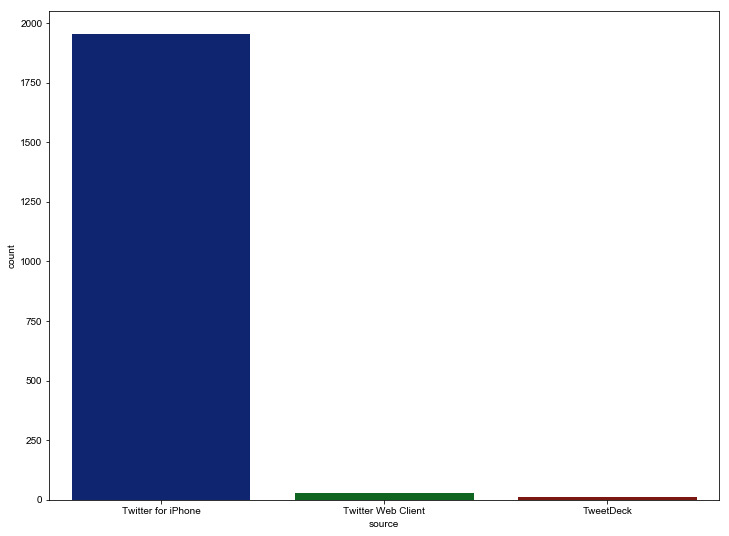

In [10]:
#A grande maioria dos posts foram enviados de iPhones. 
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
sns.set(style="darkgrid")
ax = sns.countplot(x="source", data=df_master, palette='dark')

**3.4- Qual foi a imagem mais retwitada?**

In [11]:
df_master['retweet_count'].max()

83378

In [12]:
Image(url="https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg")

Texto do Vídeo mais polular: Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad)

**3.5- Vamos produzir um mapa de correlação, para identificar quais as variáveis que se aproximam**

In [13]:
df_master.corr()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
Unnamed: 0,1.000000,-0.951083,-0.031850,0.003542,-0.369003,-0.560416,-0.230091,-0.108070,-0.130500,0.007187,-0.130321,0.053774,-0.108167
tweet_id,-0.951083,1.000000,0.023613,-0.022450,0.384629,0.611961,0.212807,0.107157,0.120866,-0.003293,0.124001,-0.049741,0.097887
rating_numerator,-0.031850,0.023613,1.000000,0.198238,0.018148,0.015889,-0.000696,-0.009013,-0.029137,-0.020774,-0.034589,-0.004207,-0.029341
rating_denominator,0.003542,-0.022450,0.198238,1.000000,-0.020309,-0.027296,-0.004121,-0.004188,0.000683,-0.034994,-0.000667,0.007029,0.004741
retweet_count,-0.369003,0.384629,0.018148,-0.020309,1.000000,0.929551,0.103633,0.049756,0.004058,-0.015188,0.014288,-0.040650,0.007980
favorite_count,-0.560416,0.611961,0.015889,-0.027296,0.929551,1.000000,0.129610,0.073695,0.045273,-0.017872,0.054153,-0.049974,0.036744
img_num,-0.230091,0.212807,-0.000696,-0.004121,0.103633,0.129610,1.000000,0.204805,0.032898,-0.156915,0.052577,-0.141693,0.062965
p1_conf,-0.108070,0.107157,-0.009013,-0.004188,0.049756,0.073695,0.204805,1.000000,0.126606,-0.509316,0.141934,-0.707757,0.119014
p1_dog,-0.130500,0.120866,-0.029137,0.000683,0.004058,0.045273,0.032898,0.126606,1.000000,0.109315,0.635573,0.046162,0.558442
p2_conf,0.007187,-0.003293,-0.020774,-0.034994,-0.015188,-0.017872,-0.156915,-0.509316,0.109315,1.000000,0.096150,0.480620,0.063764


In [14]:
crr = df_master.corr()

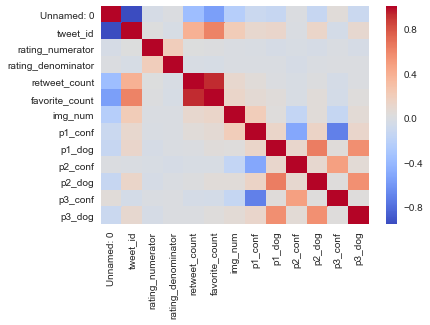

In [15]:
sns.heatmap(crr, cmap = 'coolwarm')


- A correlação mais evidente foi a entre as variáveis favorite_count e retweet_count.

- Com resultado, podemos inferir que os twittes marcados como favoritos são os mais retweetados.

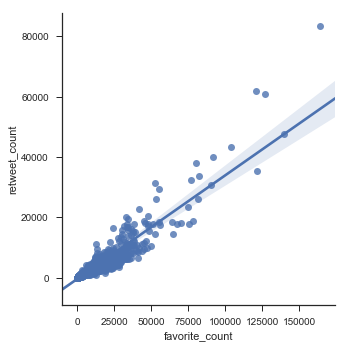

In [48]:
sns.lmplot(x='favorite_count', y='retweet_count', data=df_master, palette='coolwarm')

**3.6- Dentre os cães classificados, a grande parte foi definida como filhote, carinhosamente.***

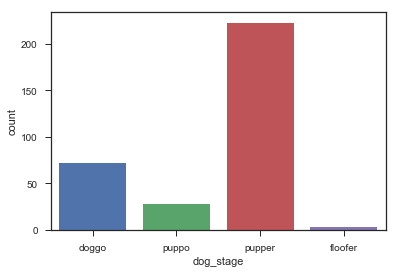

In [43]:
sns.set_style('ticks')
sns.countplot(x='dog_stage', data=df_master, saturation=0.90)

**3.7- Quais são as 10 raças com mais registros no dataframe?**

Text(0,0.5,'Contagem P1')

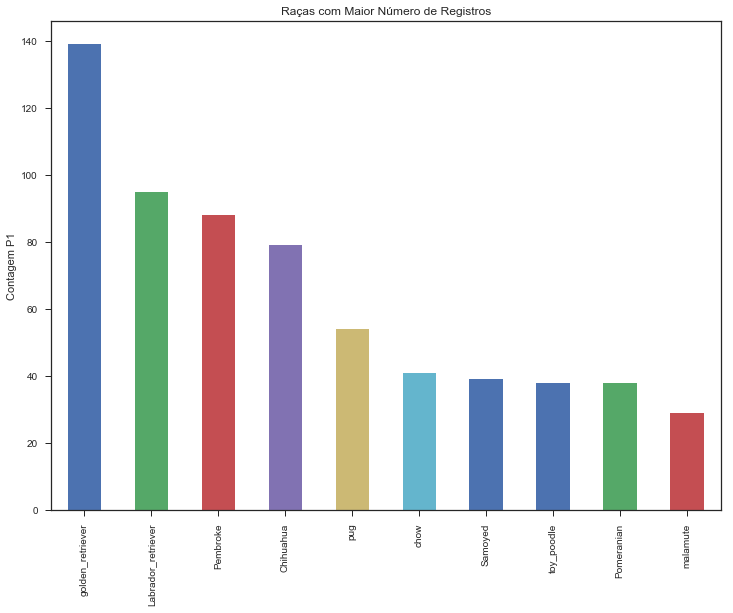

In [46]:
racas = df_master.groupby('p1').filter(lambda x: len(x) >= 28)
racas

fig, ax = plt.subplots()

fig.set_size_inches(12, 9)

racas['p1'].value_counts().plot(kind = 'bar', ax=ax);
plt.title('Raças com Maior Número de Registros')
plt.ylabel('Contagem P1')

# Limitações da Pesquisa

- Apesar da limpeza realizada, as informações abordadas possuem uma ótica estatística.
- As classificações de dog_stage, são bem reduzidas se compradas com todo o banco de dados.
- Os registros de raça, tiveram que ser limitados para um valor mínimo de 28 rgistros para que pudessem comportar os 10 registros.

